# Kernel methods for biological sequence classification

MVA 2019 - Kernel methods for machine learning

*Éloïse Berthier, Guillaume Dalle, Clément Mantoux*

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import tqdm

In [3]:
import backend
from kernels import LinearKernel, GaussianKernel

Academic license - for non-commercial use only


In [4]:
datasets = []
for k in [0, 1, 2]:
    Xtr, Ytr = backend.read_data_mat(dataset="tr" + str(k))
    Xte = backend.read_data_mat("te" + str(k))
    datasets.append([Xtr, Ytr, Xte])

In [5]:
lambd_range = np.logspace(-1.5, 3, 4)
kernel = LinearKernel()
kfold = 3

Testing lambda for dataset 1: 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]


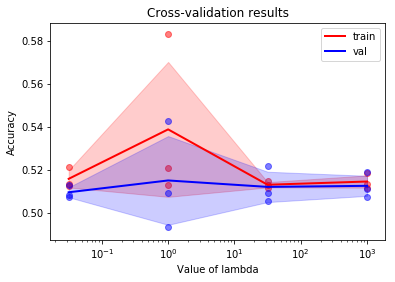

Testing lambda for dataset 2: 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]


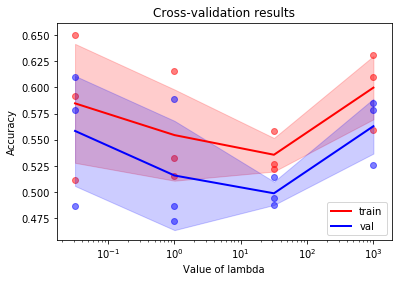

Testing lambda for dataset 3: 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]


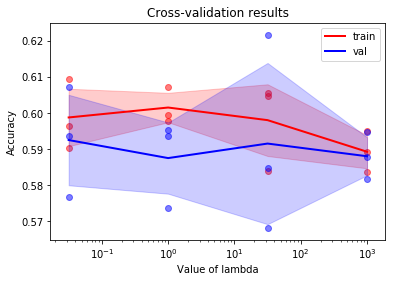

In [6]:
acc_train = np.empty((3, len(lambd_range), kfold))
acc_val = np.empty((3, len(lambd_range), kfold))
best_lambd = np.empty(3)

for d, data in enumerate(datasets):
    Xtr, Ytr, _ = data
    for i in tqdm.trange(len(lambd_range), desc="Testing lambda for dataset {}".format(d+1)):
        lambd = lambd_range[i]
        acc_train[d, i], acc_val[d, i] = backend.cross_validate(
            Xtr, Ytr,
            kernel, lambd,
            method="svm", kfold=kfold
        )
    backend.plot_CV_results(acc_train[d], acc_val[d], lambd_range, "lambda")
    
    best_lambd[d] = lambd_range[np.argmax(np.mean(acc_val[d], axis=1))]

In [7]:
backend.final_prediction(datasets, [kernel]*3, best_lambd)

DATASET 1
DATASET 2
DATASET 3
